<a href="https://colab.research.google.com/github/Nastichichika/six_semester/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
df = pd.read_csv('/content/howpop_train.csv')
df.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [19]:
df = df.drop(columns=['views_lognorm', 'favs_lognorm','comments_lognorm'])

In [20]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000


In [21]:
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0


In [22]:

df['published'] = pd.to_datetime(df['published'])
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0


In [23]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.dayofweek for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [38]:
df[df['author'] == '@Mordatyj']

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
5037,https://geektimes.ru/post/39691/,geektimes.ru,39691,2008-09-12 17:52:00,@Mordatyj,NaN,False,1657,Корпус ASUS VENTO TA-M1 – четырехкулерный скво...,10,1,353,12.0,12.0,2008,9,4,17
5531,https://geektimes.ru/post/41193/,geektimes.ru,41193,2008-09-29 15:44:00,@Mordatyj,NaN,False,2022,Porsche P'9522 – 3G-телефон со сканером отпеча...,11,0,954,5.0,1.0,2008,9,0,15
5552,https://geektimes.ru/post/41254/,geektimes.ru,41254,2008-09-30 11:19:00,@Mordatyj,NaN,False,1498,Первая в мире камера с автопривязкой к местности,21,2,148,14.0,4.0,2008,9,1,11
5558,https://geektimes.ru/post/41277/,geektimes.ru,41277,2008-09-30 16:06:00,@Mordatyj,NaN,False,2769,Часовых дел стим-мастер,48,13,573,50.0,7.0,2008,9,1,16
5590,https://geektimes.ru/post/41372/,geektimes.ru,41372,2008-10-01 15:08:00,@Mordatyj,NaN,False,2056,Набор аксессуаров Mac от Targus,7,0,259,4.0,3.0,2008,10,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23791,https://geektimes.ru/post/94428/,geektimes.ru,94428,2010-05-25 02:05:00,@Mordatyj,NaN,False,1246,19-дюймовый прозрачный дисплей от Samsung,66,4,7900,40.0,2.0,2010,5,1,2
23814,https://geektimes.ru/post/94469/,geektimes.ru,94469,2010-05-25 13:47:00,@Mordatyj,NaN,False,1019,100-долларовые аналоги iPad до конца года. Via...,61,4,300,45.0,12.0,2010,5,1,13
24689,https://geektimes.ru/post/96722/,geektimes.ru,96722,2010-06-17 15:42:00,@Mordatyj,NaN,False,1304,Анонсированы 128 ГБ модули флеш-памяти от Toshiba,37,2,457,35.0,5.0,2010,6,3,15
25643,https://geektimes.ru/post/99018/,geektimes.ru,99018,2010-07-13 18:30:00,@Mordatyj,NaN,False,929,"Microsoft спросит у пользователей Apple, почем...",8,0,195,11.0,11.0,2010,7,1,18


**1. В якому році та місяці було найбільше публікацій?**


*   Березень 2016
*   Березень 2015
*   Квітень 2015
*   Квітень 2016

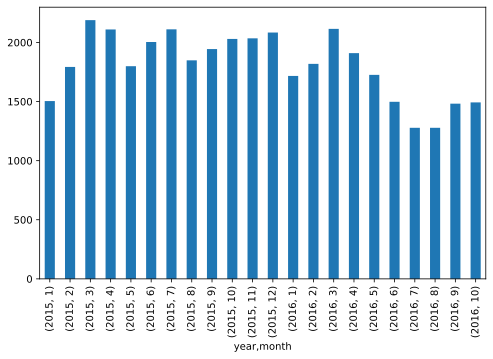

In [31]:
df[(df['year']==2015) | (df['year']==2016)].groupby(['year','month']).count()['post_id'].plot(kind='bar')

Найбільше публікацій було у Березні 2015 року.


**2. Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька варіантів.**

*   Один або кілька днів сильно виділяються із загальної картини
*   На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)
*   По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

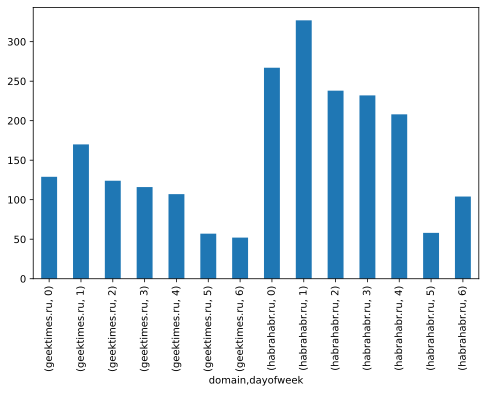

In [26]:
df[(df['year']==2015) & (df['month']==3)].groupby(['domain','dayofweek']).count()['post_id'].plot(kind='bar')

1. Так, у вівторок багато записів опубліковано.
2. На хабрі в основному більше статей ніж на гіктаймсі, але
3. в субботу майже однаково.

**4. Кого з топ-20 авторів найчастіше мінусують?**

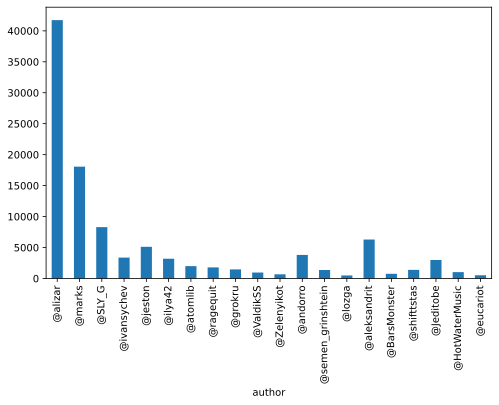

In [57]:
df.groupby('author').sum()[['views', 'votes_minus']].nlargest(20, 'views')[ 'votes_minus'].plot(kind='bar')

Частіше мінусують @alizar

**5. Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках – в основному ввечері?**

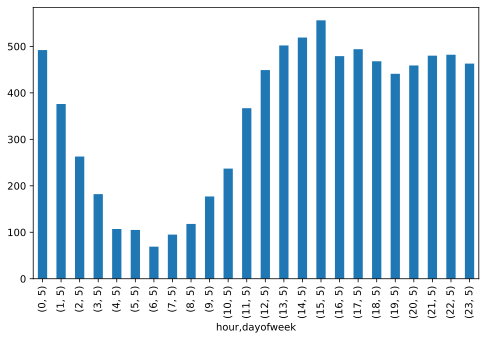

In [34]:
df[df['dayofweek']==5].groupby(['hour','dayofweek']).count()['post_id'].plot(kind='bar') 

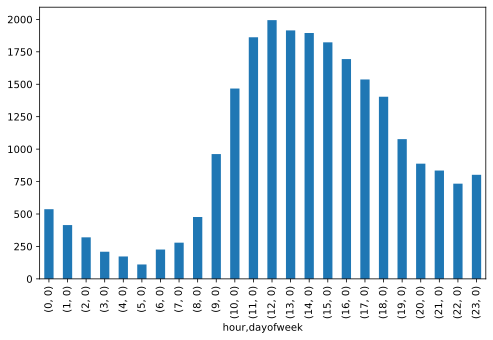

In [29]:
df[df['dayofweek']==0].groupby(['hour','dayofweek']).count()['post_id'].plot(kind='bar')

У понеділок пишуть в основному вдень. А в субботу графік приблизно однаковий як вдень так і ввечері, хоч і спостерігається невеликий під'єм удень.